# 主要处理第一个数据集
# 使用wine的130k数据集进行分析

# 1.数据预处理
## 导入

In [30]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## 查看数据前几行和每一列数据类型

In [4]:
data = pd.read_csv("input/wine/archive/winemag-data-130k-v2.csv")
print(data.head(3))
# 删除序号列
data=data.drop(labels='Unnamed: 0',axis=1)
print(data.info())
data

   Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   

    designation  points  price           province           region_1  \
0  Vulkà Bianco      87    NaN  Sicily & Sardinia               Etna   
1      Avidagos      87   15.0              Douro                NaN   
2           NaN      87   14.0             Oregon  Willamette Valley   

            region_2    taster_name taster_twitter_handle  \
0                NaN  Kerin O’Keefe          @kerinokeefe   
1                NaN     Roger Voss            @vossroger   
2  Willamette Valley   Paul Gregutt           @paulgwine    

                                           title         variety  \
0              Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1  Quinta dos Avi

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


列名解释
country: 葡萄酒生产国家 description: 葡萄酒的评价描述 designation: 酿造葡萄酒的葡萄园
points: 对葡萄酒的评分 price: 葡萄酒的价格 province: 来自的州或省份
region_1: 葡萄酒来自的产地 region_2: 葡萄酒来自的产地
variety: 酿葡萄酒的葡萄品种 winery: 葡萄酒的酿酒厂

In [20]:
wine=data.drop_duplicates()
wine.reset_index(drop=True)
wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [26]:
wine.drop_duplicates(subset=["description"])

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


由上面数据可知存在重复列

In [24]:
wine = wine.drop_duplicates(subset=["country","description","designation","points","province","taster_name","taster_twitter_handle","variety","winery"],keep='first')
wine = wine.reset_index(drop = True)
wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119982,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
119983,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
119984,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
119985,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# 2.数据可视化和摘要
## 数据摘要
### 标称属性(给出每个可能取值的频数)
#### 以country为例

In [31]:
tmpattri = "country"
print("属性","频数")
print(wine[tmpattri].value_counts(dropna=False))

属性 频数
US                        50457
France                    20353
Italy                     17939
Spain                      6116
Portugal                   5256
Chile                      4184
Argentina                  3544
Austria                    3034
Australia                  2197
Germany                    1992
South Africa               1301
New Zealand                1278
Israel                      466
Greece                      432
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     102
Uruguay                      98
Turkey                       81
Slovenia                     77
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
NaN                          59
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Uk

### country标称属性如上，同理可得其余数据标称属性

In [34]:
tmpattri = "points"
print("points", wine[tmpattri].value_counts(dropna=False),"\n")
tmpattri = "price"
print("price", wine[tmpattri].value_counts(dropna=False),"\n")
tmpattri = "province"
print("province", wine[tmpattri].value_counts(dropna=False),"\n")
tmpattri = "taster_name"
print("taster_name", wine[tmpattri].value_counts(dropna=False),"\n")
tmpattri = "taster_twitter_handle"
print("taster_twitter_handle",wine[tmpattri].value_counts(dropna=False),"\n")
tmpattri = "variety"
print("variety", wine[tmpattri].value_counts(dropna=False),"\n")
tmpattri = "winery"
print("winery", wine[tmpattri].value_counts(dropna=False),"\n")

points 88     15290
87     15279
90     13893
86     11526
89     11147
91     10559
85      9067
92      8951
84      6225
93      6170
94      3625
83      2963
82      1814
95      1514
81       689
96       521
80       397
97       228
98        77
99        33
100       19
Name: points, dtype: int64 

price NaN       8395
20.0      6335
15.0      5557
25.0      5320
18.0      4507
          ... 
238.0        1
1200.0       1
428.0        1
269.0        1
540.0        1
Name: price, Length: 391, dtype: int64 

province California           33656
Washington            7965
Bordeaux              5556
Tuscany               5391
Oregon                4929
                     ...  
Hrvatsko Primorje        1
Ticino                   1
Gladstone                1
Dingač                   1
Dalmatian Coast          1
Name: province, Length: 426, dtype: int64 

taster_name NaN                   24916
Roger Voss            23560
Michael Schachner     14046
Kerin O’Keefe          9697
Paul 

### 数值属性(给出5数概括及缺失值的个数)
### 注意只有部分属性才能进行统计计算，country等无法进行
以points属性为例

In [128]:
print(wine["points"].describe(),"\n")
wine["points"].isnull().sum()

count    119987.000000
mean         88.442240
std           3.092928
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64 



0

### 由此可见points的min为80，max为100，第1四分位数为86，第2四分位数为88, 第3四分位数为 91，没有缺失值
同理可求price的数值属性

In [36]:
print(wine["price"].describe(),"\n")
wine["price"].isnull().sum()

count    111592.000000
mean         35.620752
std          42.103917
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64 



8395

### 由此可见price的min为4，max为3300，第1四分位数为17，第2四分位数为25, 第3四分位数为 42，缺失值个数8395

## 数据可视化
### 直方图（取前20）

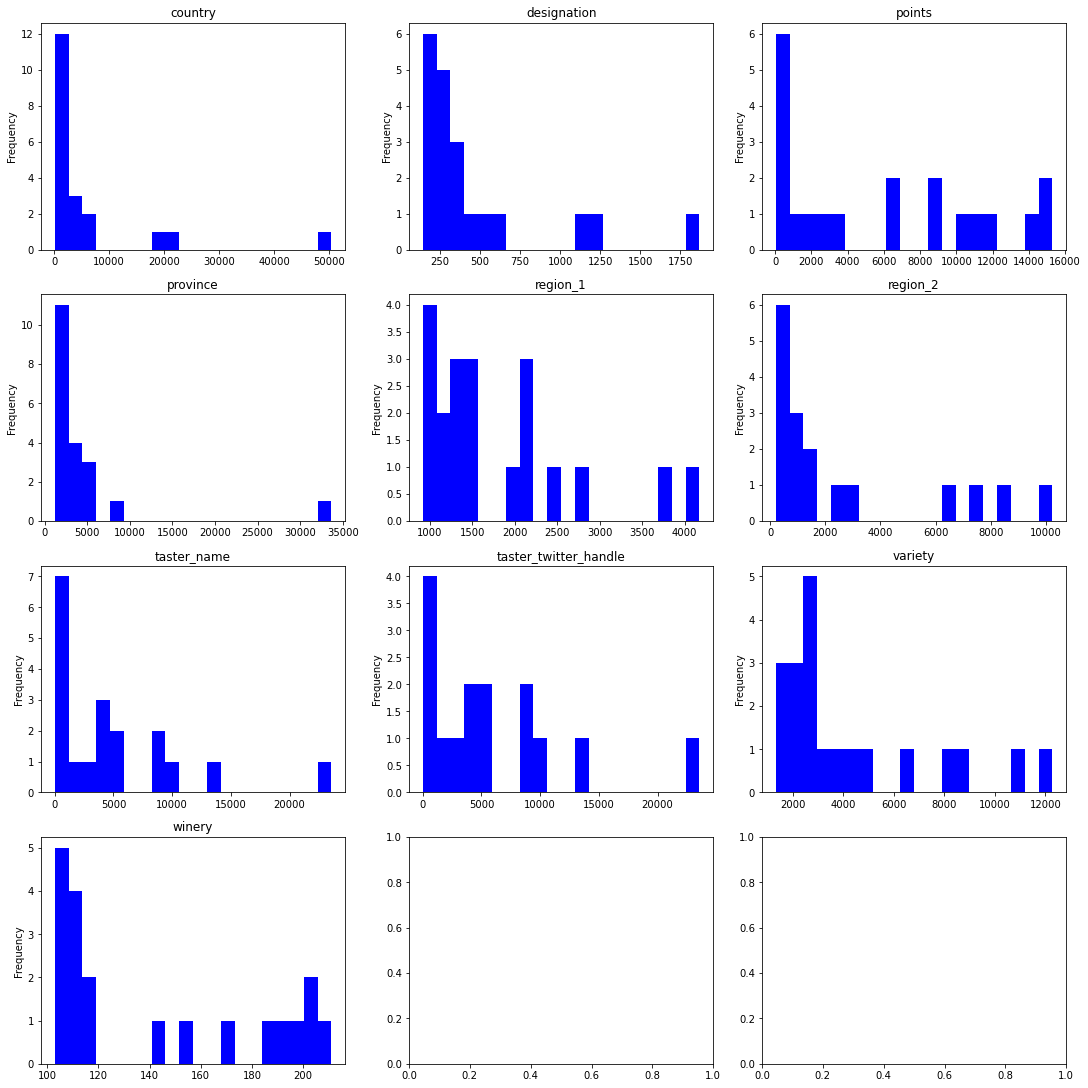

In [112]:
fig,ax = plt.subplots(nrows=4,ncols=3,figsize=(15,15),constrained_layout=True)

name = ['country','designation','points','province','region_1','region_2','taster_name','taster_twitter_handle','variety','winery']
n_index = 0
for i in range(4):
    for j in range(3):
        if n_index>9:
            break
        tmp = wine[name[n_index]].value_counts()[:20]
        tmp.plot.hist(wine[attri],20,histtype='stepfilled',facecolor='b',title=name[n_index],ax = ax[i][j])
        # tmp.plot(kind='bar',title=name[n_index],ax = ax[i][j])
        n_index += 1 

### 绘制价格-度数的散点图，如下图所示，显而易见明显存在离群点

Text(0.5, 1.0, 'Scatter')

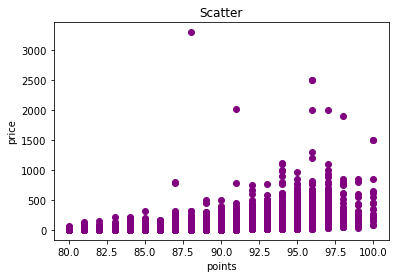

In [84]:
plt.scatter(x=wine['points'], y=wine['price'],color='purple')
plt.xlabel('points')
plt.ylabel('price')
plt.title('Scatter')

### 构建盒图方法如下

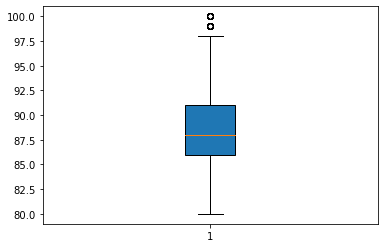

In [90]:
bplt = plt.boxplot(wine['points'], notch=False, sym='o', vert=True, patch_artist=True)

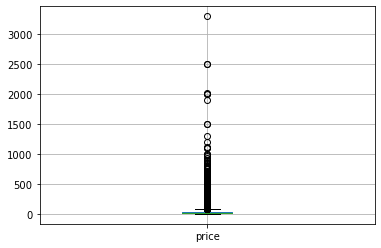

In [86]:
p = wine.boxplot(['price'])

### price中大于等于77的项被识别为离群点
## 3.数据缺失的处理


### 未处理数据

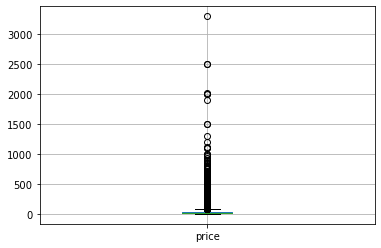

In [113]:
attri = "price" 
p = wine.boxplot(['price'])

### 将缺失部分剔除:以price为例

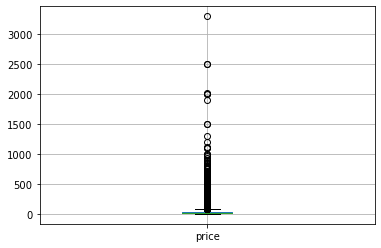

In [122]:
attri = "price" 
winenoattr = wine.dropna(subset=[attri])
p = winenoattr.boxplot([attri])

### 用最高频率值来填补缺失值

0    20.0
dtype: float64


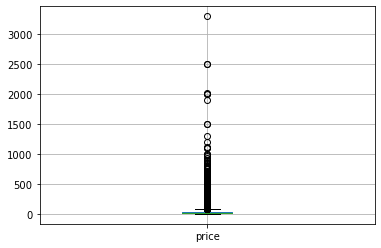

In [132]:
attri = "price" 
print(wine[attri].mode())
points_list = wine['points'].fillna(20)
p = winenoattr.boxplot([attri])

# Melbourne Airbnb Open Data

In [165]:
airbnb = pd.read_csv("input/airbnb/listings_summary_dec18.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.772684,145.092133,Private room,60,1,4,2015-09-12,0.04,1,365
1,10803,Room in Cool Deco Apartment in Brunswick,38901,Lindsay,NaN,Moreland,-37.766505,144.980736,Private room,35,3,108,2018-11-26,1.50,1,213
2,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,50121,Frank & Vince,NaN,Port Phillip,-37.859755,144.977369,Entire home/apt,159,3,15,2018-11-07,0.15,17,326
3,15246,Large private room-close to city,59786,Eleni,NaN,Darebin,-37.758971,144.989228,Private room,50,2,29,2017-05-15,0.30,3,0
4,16760,Melbourne BnB near City & Sports,65090,Colin,NaN,Port Phillip,-37.864530,144.992238,Private room,69,1,63,2018-11-22,0.74,1,328


In [156]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22895 entries, 9835 to 30593623
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            22892 non-null  object 
 1   host_id                         22895 non-null  int64  
 2   host_name                       22892 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   22895 non-null  object 
 5   latitude                        22895 non-null  float64
 6   longitude                       22895 non-null  float64
 7   room_type                       22895 non-null  object 
 8   price                           22895 non-null  int64  
 9   minimum_nights                  22895 non-null  int64  
 10  number_of_reviews               22895 non-null  int64  
 11  last_review                     17653 non-null  object 
 12  reviews_per_month         

## 查看缺失值

In [159]:
airbnb.isnull().sum()

name                                  3
host_id                               0
host_name                             3
neighbourhood_group               22895
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        5242
reviews_per_month                  5242
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### last_review没有意义，因此删除该列

In [166]:
airbnbdrop = airbnb.drop(['last_review'],axis=1)
airbnbdrop.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365
1,10803,Room in Cool Deco Apartment in Brunswick,38901,Lindsay,NaN,Moreland,-37.766505,144.980736,Private room,35,3,108,1.50,1,213
2,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,50121,Frank & Vince,NaN,Port Phillip,-37.859755,144.977369,Entire home/apt,159,3,15,0.15,17,326
3,15246,Large private room-close to city,59786,Eleni,NaN,Darebin,-37.758971,144.989228,Private room,50,2,29,0.30,3,0
4,16760,Melbourne BnB near City & Sports,65090,Colin,NaN,Port Phillip,-37.864530,144.992238,Private room,69,1,63,0.74,1,328


### 离群点检测

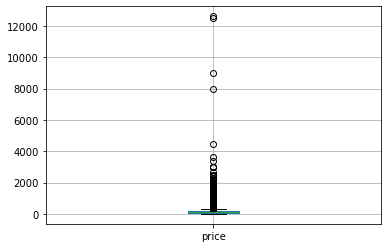

In [168]:
p = airbnbdrop.boxplot(['price'])

可以看出超过5000部分为离群点，删除之

In [169]:
airbnbdrop = airbnbdrop[airbnbdrop['price']<5000]
print(airbnb.shape)
print(airbnbdrop.shape)

(22895, 16)
(22891, 15)


Text(0.5, 1.0, 'Scatter')

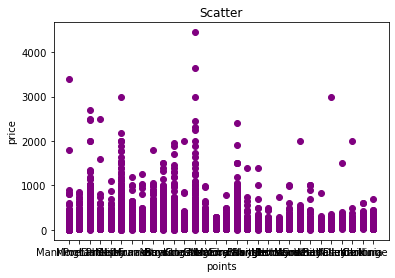

In [173]:
plt.scatter(x=airbnbdrop['neighbourhood'], y=airbnbdrop['price'],color='purple')
plt.xlabel('points')
plt.ylabel('price')
plt.title('Scatter')